Noughts and crosses by alpha beta pruning

In [8]:
import math

def print_board(board):
    #Prints the Tic-Tac-Toe board in a readable format."""
    for row in board:
        print(" | ".join(row))  # Display row with separators
        print("-" * 9)  # Print a separator line after each row

def is_moves_left(board):
    #"""Checks if there are any empty spaces left on the board."""
    return any(cell == " " for row in board for cell in row)

def evaluate(board):
    #"""Evaluates the board state to determine if there's a winner."""
    # Check rows for a win
    for row in board:
        if row[0] == row[1] == row[2] != " ":
            return 10 if row[0] == 'X' else -10

    # Check columns for a win
    for col in range(3):
        if board[0][col] == board[1][col] == board[2][col] != " ":
            return 10 if board[0][col] == 'X' else -10

    # Check diagonals for a win
    if board[0][0] == board[1][1] == board[2][2] != " ":
        return 10 if board[0][0] == 'X' else -10
    if board[0][2] == board[1][1] == board[2][0] != " ":
        return 10 if board[0][2] == 'X' else -10

    return 0  # No winner yet

def minimax(board, depth, is_max, alpha, beta):
    #Minimax algorithm with alpha-beta pruning to determine the best move.
    score = evaluate(board)

    # If the game is over (win/loss), return the score adjusted by depth
    if score == 10 or score == -10:
        return score - depth if score > 0 else score + depth

    # If no moves are left, it's a draw
    if not is_moves_left(board):
        return 0

    # Maximizer's move (AI - 'X')
    if is_max:
        best = -math.inf  # Worst case for maximizer
        for i in range(3):
            for j in range(3):
                if board[i][j] == " ":  # Check for empty cell
                    board[i][j] = 'X'  # Try move
                    best = max(best, minimax(board, depth + 1, False, alpha, beta))
                    board[i][j] = " "  # Undo move (backtrack)
                    alpha = max(alpha, best)  # Update alpha (best for maximizer)
                    if beta <= alpha:  # Prune branches
                        break
        return best
    else:
        # Minimizer's move (Player - 'O')
        best = math.inf  # Worst case for minimizer
        for i in range(3):
            for j in range(3):
                if board[i][j] == " ":  # Check for empty cell
                    board[i][j] = 'O'  # Try move
                    best = min(best, minimax(board, depth + 1, True, alpha, beta))
                    board[i][j] = " "  # Undo move (backtrack)
                    beta = min(beta, best)  # Update beta (best for minimizer)
                    if beta <= alpha:  # Prune branches
                        break
        return best

def find_best_move(board):
    #Finds the best move for the AI ('X') using the Minimax algorithm.
    best_val = -math.inf  # Initialize with worst case
    best_move = (-1, -1)  # Initialize best move

    for i in range(3):
        for j in range(3):
            if board[i][j] == " ":  # Check for empty cell
                board[i][j] = 'X'  # Try move
                move_val = minimax(board, 0, False, -math.inf, math.inf)
                board[i][j] = " "  # Undo move (backtrack)
                if move_val > best_val:  # Check if this move is better
                    best_move = (i, j)
                    best_val = move_val

    return best_move  # Return best move found

def main():
    #Main function that runs the Tic-Tac-Toe game."""
    board = [[" " for _ in range(3)] for _ in range(3)]  # Initialize empty board
    print("Welcome to Noughts and Crosses! You play as 'O'.")
    print_board(board)

    for turn in range(9):  # Maximum of 9 turns in a 3x3 board
        if turn % 2 == 0:  # AI's turn
            row, col = find_best_move(board)
            board[row][col] = 'X'
            print("AI (X) plays:")
        else:  # Player's turn
            while True:
                try:
                    row, col = map(int, input("Enter row and column (0-2) separated by space: ").split())
                    if board[row][col] == " ":
                        board[row][col] = 'O'
                        break
                    else:
                        print("Cell occupied! Try again.")
                except (ValueError, IndexError):
                    print("Invalid input! Enter numbers between 0 and 2.")

        print_board(board)  # Display updated board

        # Check for winner
        score = evaluate(board)
        if score == 10:
            print("AI (X) wins!")
            return
        elif score == -10:
            print("You (O) win!")
            return

    print("It's a draw!")  # If no one wins after 9 moves

if __name__ == "__main__":
    main()


Welcome to Noughts and Crosses! You play as 'O'.
  |   |  
---------
  |   |  
---------
  |   |  
---------
AI (X) plays:
X |   |  
---------
  |   |  
---------
  |   |  
---------
Enter row and column (0-2) separated by space: 1 1
X |   |  
---------
  | O |  
---------
  |   |  
---------
AI (X) plays:
X | X |  
---------
  | O |  
---------
  |   |  
---------
Enter row and column (0-2) separated by space: 0 2
X | X | O
---------
  | O |  
---------
  |   |  
---------
AI (X) plays:
X | X | O
---------
  | O |  
---------
X |   |  
---------
Enter row and column (0-2) separated by space: 1 0
X | X | O
---------
O | O |  
---------
X |   |  
---------
AI (X) plays:
X | X | O
---------
O | O | X
---------
X |   |  
---------
Enter row and column (0-2) separated by space: 2 2
X | X | O
---------
O | O | X
---------
X |   | O
---------
AI (X) plays:
X | X | O
---------
O | O | X
---------
X | X | O
---------
It's a draw!


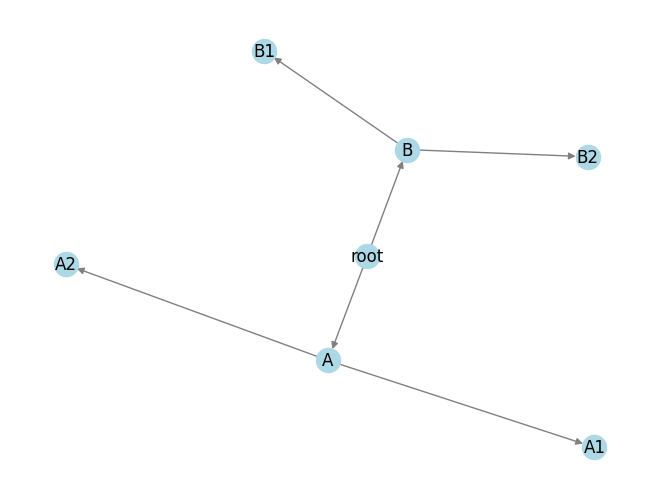

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to visualize a simple Minimax decision tree
def visualize_minimax():
    G = nx.DiGraph()  # Create a directed graph

    # Define edges representing decision paths
    edges = [
        ("root", "A"), ("root", "B"),  # Root branching into A and B
        ("A", "A1"), ("A", "A2"),      # A branching into A1 and A2
        ("B", "B1"), ("B", "B2")       # B branching into B1 and B2
    ]

    G.add_edges_from(edges)  # Add edges to the graph
    pos = nx.spring_layout(G)  # Define the layout of the graph

    # Draw the graph with labels and customized appearance
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.show()  # Display the graph

# Call the function to visualize the Minimax tree
visualize_minimax()
